<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week7_Day1_ExerciceXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Exploring Text Preprocessing usage, NER and POS tags

In [2]:
import nltk
import string
from nltk.tokenize import word_tokenize

# Télécharger les ressources nécessaires

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import spacy

# Charger le modèle anglais
nlp = spacy.load("en_core_web_sm")

def preprocess_text(data):
    preprocessed_reviews = []

    for review in data['Review']:
        doc = nlp(review.lower())  # Mise en minuscules + analyse

        # Tokenisation + suppression ponctuation + lemmatisation
        tokens = [
            token.lemma_ for token in doc
            if not token.is_punct and not token.is_space
        ]

        # Rejoindre les mots en chaîne de caractères nettoyée
        cleaned_review = " ".join(tokens)
        preprocessed_reviews.append(cleaned_review)

    return preprocessed_reviews


In [5]:
data = {
    'Review': [
        "At McDonald's the food was ok and the service was bad.",
        "I would not recommend this Japanese restaurant to anyone.",
        "I loved this restaurant when I traveled to Thailand last summer.",
    ]
}

processed_data = preprocess_text(data)

for i, review in enumerate(processed_data):
    print(f"Review {i+1}:", review)


Review 1: at mcdonald 's the food be ok and the service be bad
Review 2: I would not recommend this japanese restaurant to anyone
Review 3: I love this restaurant when I travel to thailand last summer


In [6]:
import spacy

# Charger le modèle anglais
nlp = spacy.load("en_core_web_sm")

def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [7]:
text = "I visited Google headquarters in California last January."
entities = perform_ner(text)

for ent_text, ent_label in entities:
    print(f"{ent_text} → {ent_label}")


Google → ORG
California → GPE
last January → DATE


In [8]:
data = {
    'Review': [
        "At McDonald's the food was ok and the service was bad.",
        "I would not recommend this Japanese restaurant to anyone.",
        "I loved this restaurant when I traveled to Thailand last summer.",
    ]
}
for review in data['Review']:
    entities = perform_ner(review)
    print(f"Review: {review}")
    for ent_text, ent_label in entities:
        print(f"  {ent_text} → {ent_label}")
    print("---")

for review in processed_data:
    entities = perform_ner(review)
    print(f"Review: {review}")
    for ent_text, ent_label in entities:
        print(f"  {ent_text} → {ent_label}")
    print("---")


Review: At McDonald's the food was ok and the service was bad.
  McDonald → ORG
---
Review: I would not recommend this Japanese restaurant to anyone.
  Japanese → NORP
---
Review: I loved this restaurant when I traveled to Thailand last summer.
  Thailand → GPE
  last summer → DATE
---
Review: at mcdonald 's the food be ok and the service be bad
  mcdonald 's → ORG
---
Review: I would not recommend this japanese restaurant to anyone
  japanese → NORP
---
Review: I love this restaurant when I travel to thailand last summer
  thailand → GPE
  last summer → DATE
---


In [9]:
import nltk
from nltk import pos_tag, word_tokenize

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Fonction pour le POS tagging
def perform_pos_tagging(text):
    tokens = word_tokenize(text)            # Tokenisation
    tagged = pos_tag(tokens)                # POS tagging
    return tagged                           # Retourne la liste des (mot, tag)
for review in data['Review']:
    print(f"Review: {review}")
    tagged_words = perform_pos_tagging(review)
    for word, tag in tagged_words:
        print(f"  Word: {word}, POS: {tag}")
    print("---")


Review: At McDonald's the food was ok and the service was bad.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


  Word: At, POS: IN
  Word: McDonald, POS: NNP
  Word: 's, POS: POS
  Word: the, POS: DT
  Word: food, POS: NN
  Word: was, POS: VBD
  Word: ok, POS: JJ
  Word: and, POS: CC
  Word: the, POS: DT
  Word: service, POS: NN
  Word: was, POS: VBD
  Word: bad, POS: JJ
  Word: ., POS: .
---
Review: I would not recommend this Japanese restaurant to anyone.
  Word: I, POS: PRP
  Word: would, POS: MD
  Word: not, POS: RB
  Word: recommend, POS: VB
  Word: this, POS: DT
  Word: Japanese, POS: JJ
  Word: restaurant, POS: NN
  Word: to, POS: TO
  Word: anyone, POS: NN
  Word: ., POS: .
---
Review: I loved this restaurant when I traveled to Thailand last summer.
  Word: I, POS: PRP
  Word: loved, POS: VBD
  Word: this, POS: DT
  Word: restaurant, POS: NN
  Word: when, POS: WRB
  Word: I, POS: PRP
  Word: traveled, POS: VBD
  Word: to, POS: TO
  Word: Thailand, POS: NNP
  Word: last, POS: JJ
  Word: summer, POS: NN
  Word: ., POS: .
---


In [10]:
for review in processed_data:
    print(f"Review: {review}")
    tagged_words = perform_pos_tagging(review)
    for word, tag in tagged_words:
        print(f"  Word: {word}, POS: {tag}")
    print("---")

Review: at mcdonald 's the food be ok and the service be bad
  Word: at, POS: IN
  Word: mcdonald, POS: NN
  Word: 's, POS: POS
  Word: the, POS: DT
  Word: food, POS: NN
  Word: be, POS: VB
  Word: ok, POS: JJ
  Word: and, POS: CC
  Word: the, POS: DT
  Word: service, POS: NN
  Word: be, POS: VB
  Word: bad, POS: JJ
---
Review: I would not recommend this japanese restaurant to anyone
  Word: I, POS: PRP
  Word: would, POS: MD
  Word: not, POS: RB
  Word: recommend, POS: VB
  Word: this, POS: DT
  Word: japanese, POS: JJ
  Word: restaurant, POS: NN
  Word: to, POS: TO
  Word: anyone, POS: NN
---
Review: I love this restaurant when I travel to thailand last summer
  Word: I, POS: PRP
  Word: love, POS: VBP
  Word: this, POS: DT
  Word: restaurant, POS: NN
  Word: when, POS: WRB
  Word: I, POS: PRP
  Word: travel, POS: VBP
  Word: to, POS: TO
  Word: thailand, POS: VB
  Word: last, POS: JJ
  Word: summer, POS: NN
---


Exercise 2: Plotting the word embeddings

In [3]:
!pip uninstall -y scipy gensim
!pip install scipy==1.10.1 gensim==4.3.1

Found existing installation: scipy 1.16.0
Uninstalling scipy-1.16.0:
  Successfully uninstalled scipy-1.16.0
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 53.2 MB/s eta 0:00:00
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all th

In [1]:
from gensim.models import Word2Vec
print("Import réussi !")

Import réussi !


In [2]:
preprocessed_tokenized = [
    ["at", "mcdonald", "'s", "the", "food", "be", "ok", "and", "the", "service", "be", "bad"],
    ["i", "would", "not", "recommend", "this", "japanese", "restaurant", "to", "anyone"],
    ["i", "love", "this", "restaurant", "when", "i", "travel", "to", "thailand", "last", "summer"]
]


# Créer le modèle Word2Vec
model = Word2Vec(
    sentences=preprocessed_tokenized,
    vector_size=50,  # dimension des vecteurs (embeddings)
    window=5,        # taille de la fenêtre contextuelle
    min_count=1,     # ignorer les mots qui apparaissent moins de 1 fois
    workers=4,       # nombre de threads
    sg=0             # 0 = CBOW (par défaut), 1 = Skip-Gram
)

# Afficher les dimensions et infos du modèle
print(f"Nombre de mots dans le vocabulaire : {len(model.wv)}")
print(f"Dimension des vecteurs : {model.vector_size}")


Nombre de mots dans le vocabulaire : 25
Dimension des vecteurs : 50


In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(word2vec_model):
    # Récupérer la liste des mots et leurs vecteurs
    words = list(word2vec_model.wv.index_to_key)
    vectors = word2vec_model.wv[words]

    # Réduire les dimensions à 2D avec PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

    # Annoter chaque point avec le mot correspondant
    for i, word in enumerate(words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.title("Visualisation des embeddings Word2Vec en 2D (PCA)")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.grid(True)
    plt.show()


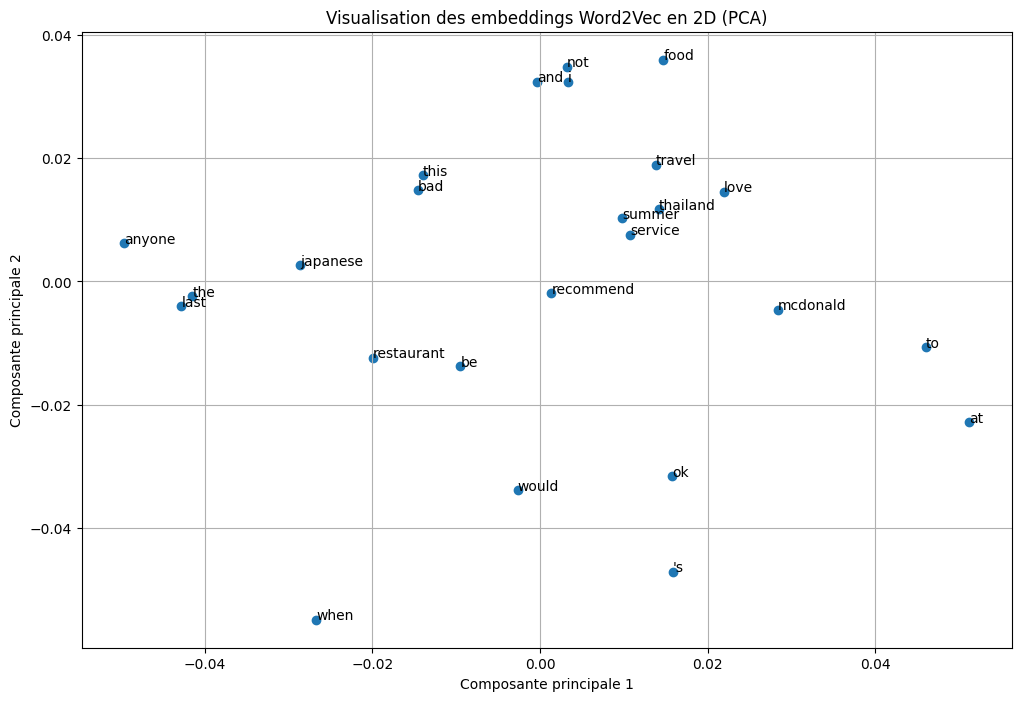

In [4]:
plot_word_embeddings(model)
